In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing the Data and EDA

In [2]:
train_data = pd.read_excel("./data/Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None) # displays all columns in dataset

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All our features are type string, so we need to engineer all of these.

In [6]:
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only at most 2 rows with missing values, so we will go ahead and delete these.

In [7]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.shape

(10682, 11)

All the features that represent time: `Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration` need to be represented using datetime object.

Let's extract the date and month of journey, since those affect the price.

In [9]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Let's just drop `Date_of_Journey` since the data is all 2019. 

In [10]:
train_data.drop(columns=['Date_of_Journey'], inplace=True)
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month'],
      dtype='object')

Next, let's extract the hours and minutes from `Dep_Time` and just drop that column.

In [11]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop(columns=['Dep_Time'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Let's do the same for `Arrival_Time`.

In [12]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop(columns=['Arrival_Time'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


We need now to extract hours and minutes from `Duration`.

In [13]:
durations = train_data['Duration']
type(durations)

pandas.core.series.Series

In [14]:
train_data['Duration_hours'] = durations.str.split().str[0].str[0].astype(np.uint8)


In [15]:
train_data['Duration_mins'] = durations.str.split().str[1].str[:-1].fillna(0).astype(np.uint8)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
 14  Duration_hours   10682 non-null  uint8 
 15  Duration_mins    10682 non-null  uint8 
dtypes: int64(7), object(7), uint8(2)
memory usage: 1.2+ MB


In [17]:
train_data.drop(columns=['Duration'], inplace=True)
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

### Dealing with Categorical Data

There are 2 main categorical data types:
1. For nominal categorical data, we can use **OneHotEncoder**.
2. For ordinal categorical data, we can use **LabelEncoder**.

In [18]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Before encoding this, let's visualize Airline vs Price.

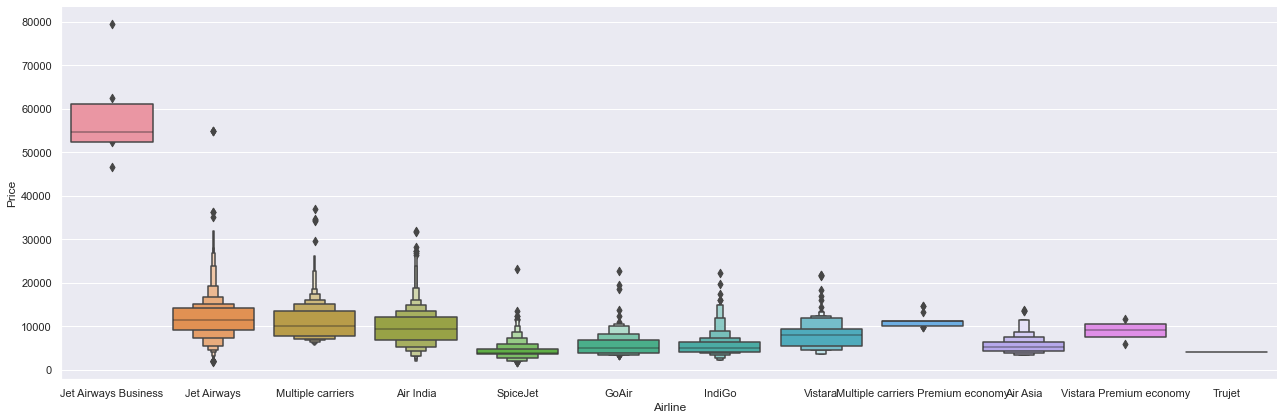

In [19]:
sns.catplot(x='Airline', y='Price', data=train_data.sort_values(by='Price', ascending=False), kind='boxen', height=6, aspect=3)

We see that Jet Airways Business is kind of significantly more expensive than others. The rest are pretty similar. This feature is a nominal categorical variable so we will use OneHotEncoding.

In [20]:
from sklearn.preprocessing import OneHotEncoder

airlines = train_data[['Airline']]
airline_encoder = OneHotEncoder(drop='first')
airlines = airline_encoder.fit_transform(airlines)

airlines = pd.DataFrame(columns = airline_encoder.categories_[0][1:], data=airlines.toarray())

In [21]:
airlines.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [22]:
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
airlines = airlines.astype(np.uint8)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Now, let's deal with `Source`.

In [24]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

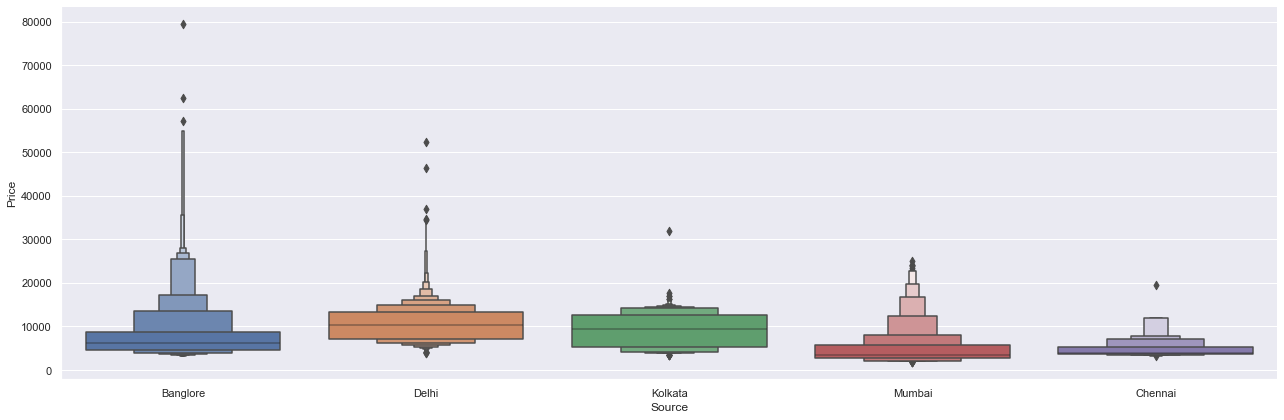

In [25]:
sns.catplot(x='Source', y='Price', data=train_data.sort_values(by='Price', ascending=False), height=6, aspect=3, kind='boxen');

Since `Source` is a nominal categorical variable, we will use OneHotEncoding.

In [26]:
sources = train_data[['Source']]

source_encoder = OneHotEncoder(drop='first')
sources = source_encoder.fit_transform(sources)
sources = pd.DataFrame(columns = source_encoder.categories_[0][1:], data=sources.toarray())
sources = sources.astype(np.uint8, copy=True)
sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
sources.columns = "Source_" + sources.columns
airlines.columns = "Airline_" + airlines.columns

Let's do the same for `Destination`.

In [28]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [29]:
destinations = train_data[['Destination']]
dest_encoder = OneHotEncoder(drop='first')
destinations = dest_encoder.fit_transform(destinations)
destinations = pd.DataFrame(columns=dest_encoder.categories_[0][1:], data=destinations.toarray())
destinations = destinations.astype(np.uint8)
destinations.columns = "Destination_" + destinations.columns
destinations.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Let's explore `Route` and `Additional_Info`.

In [30]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [31]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Since `Total_Stops` gives us info about `Route`, and `Additional_Info` has 80% of `No info`, we will drop `Route` and `Additional_Info`.

In [32]:
train_data.drop(columns=['Route', 'Additional_Info'], inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


Now, `Total_Stops` is actually an ordinal categorical variable, we need to use Label Encoding.

In [33]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
total_stops = train_data['Total_Stops']
total_stops = total_stops.str.split().str[0].replace('non-stop', 0).astype(np.uint8)
total_stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: uint8

In [35]:
train_data['Total_Stops'] = total_stops
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


Let's combine all the one-hot encoded features into our training dataset.

In [36]:
data_train = pd.concat([train_data, airlines, sources, destinations], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
data_train.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
data_train.dropna(inplace=True)
data_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [39]:
data_train = data_train.astype(np.int64)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10681
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10681 non-null  int64
 1   Price                                      10681 non-null  int64
 2   Journey_day                                10681 non-null  int64
 3   Journey_month                              10681 non-null  int64
 4   Dep_hour                                   10681 non-null  int64
 5   Dep_min                                    10681 non-null  int64
 6   Arrival_hour                               10681 non-null  int64
 7   Arrival_min                                10681 non-null  int64
 8   Duration_hours                             10681 non-null  int64
 9   Duration_mins                              10681 non-null  int64
 10  Airline_Air India                          106

In [40]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.shape

(10681, 30)

## Create a Pipeline for Data Preprocessing

To avoid data leakage, we need to process train and set data separately. Let's write a pipeline to preprocess our data.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [43]:
test = pd.read_excel("./data/Test_set.xlsx")

In [44]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [45]:
class na_remover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.dropna()

In [46]:
date_time_cols = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']

class date_time_extractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Journey_day'] = pd.to_datetime(X['Date_of_Journey'], format='%d/%m/%Y').dt.day
        X['Journey_month'] = pd.to_datetime(X['Date_of_Journey'], format='%d/%m/%Y').dt.month

        X['Dep_hour'] = pd.to_datetime(X['Dep_Time']).dt.hour
        X['Dep_min'] = pd.to_datetime(X['Dep_Time']).dt.minute

        X['Arrival_hour'] = pd.to_datetime(X['Arrival_Time']).dt.hour
        X['Arrival_min'] = pd.to_datetime(X['Arrival_Time']).dt.minute

        X['Duration_hours'] = X['Duration'].str.split().str[0].str[0].astype(np.uint8)
        X['Duration_mins'] = X['Duration'].str.split().str[1].str[:-1].fillna(0).astype(np.uint8)

        return X

In [47]:
one_hot_cols = ['Airline', 'Source', 'Destination']

class one_hot_encoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for col in one_hot_cols:
            feature = X[[col]]
            enc = OneHotEncoder(drop='first')
            feature = enc.fit_transform(feature)
            feature = pd.DataFrame(columns=enc.categories_[0][1:], data=feature.toarray())
            feature = feature.astype(np.uint8)
            feature.columns = col + "_" + feature.columns
            X = pd.concat([X, feature], axis=1)

        return X


In [48]:
class total_stop_converter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Total_Stops'] = X['Total_Stops'].str.split().str[0].replace('non-stop', 0).astype(np.uint8)
        return X

In [49]:
to_drop = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']

class attr_remover(BaseEstimator, TransformerMixin):
    def __init__(self, drop=None):
        self.drop = drop
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.drop:
            return X.drop(columns=self.drop)
        return X

In [50]:
full_pipeline = Pipeline([
    ("remove_na", na_remover()),
    ("date_time_extract", date_time_extractor()),
    ("one_hot_encode", one_hot_encoder()),
    ("total_stop_ordinal_encoder", total_stop_converter()),
    ("remove_attr", attr_remover(to_drop))
])

In [51]:
data_test = full_pipeline.fit_transform(test)
data_test.shape

(2671, 28)

In [52]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,1,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,2,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature Selection

Here are some feature selection methods to select the ones that are correlated with target variable:

1. `heatmap`
2. `feature_importance`
3. `SelectKBest`

In [53]:
X = data_train.drop(columns=['Price'])
y = data_train['Price']

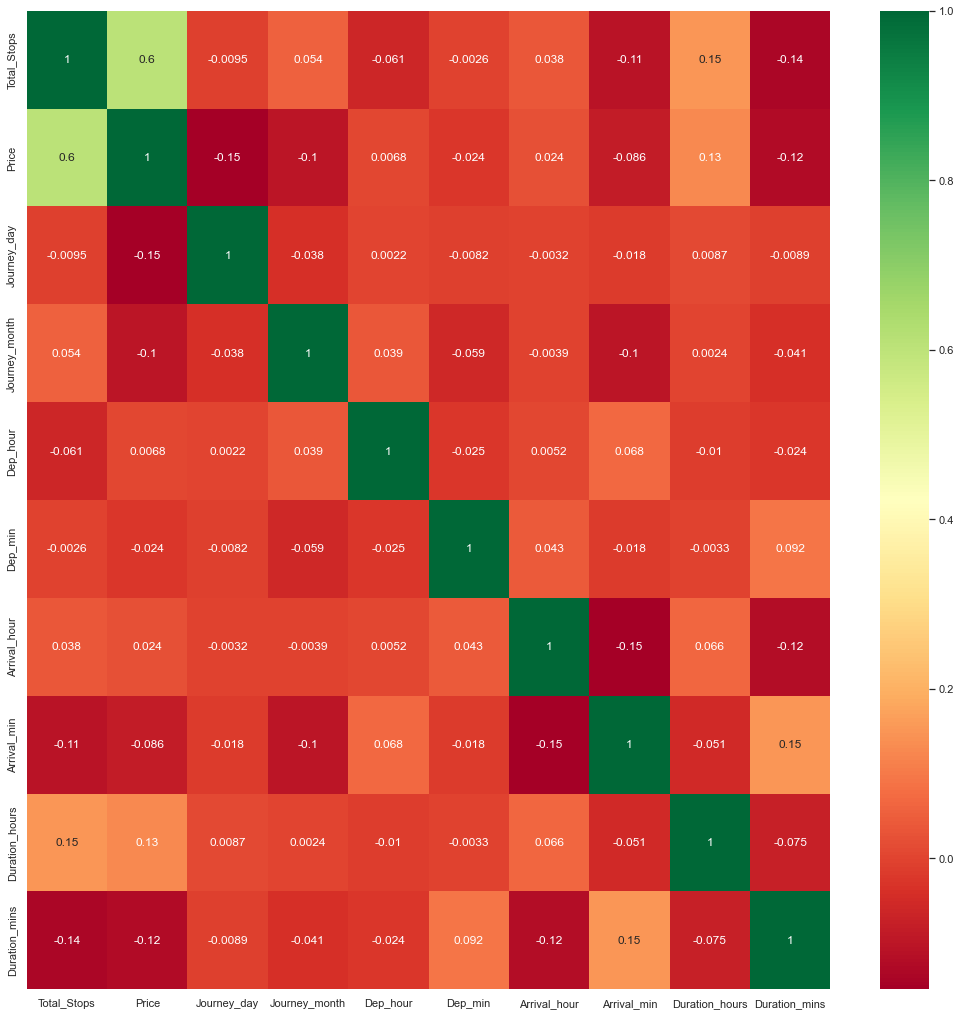

In [54]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn');

Tree-based models return an attribute called feature importance when we fit it. So we can fit a tree-based model just for the feature importances and then not use that model.
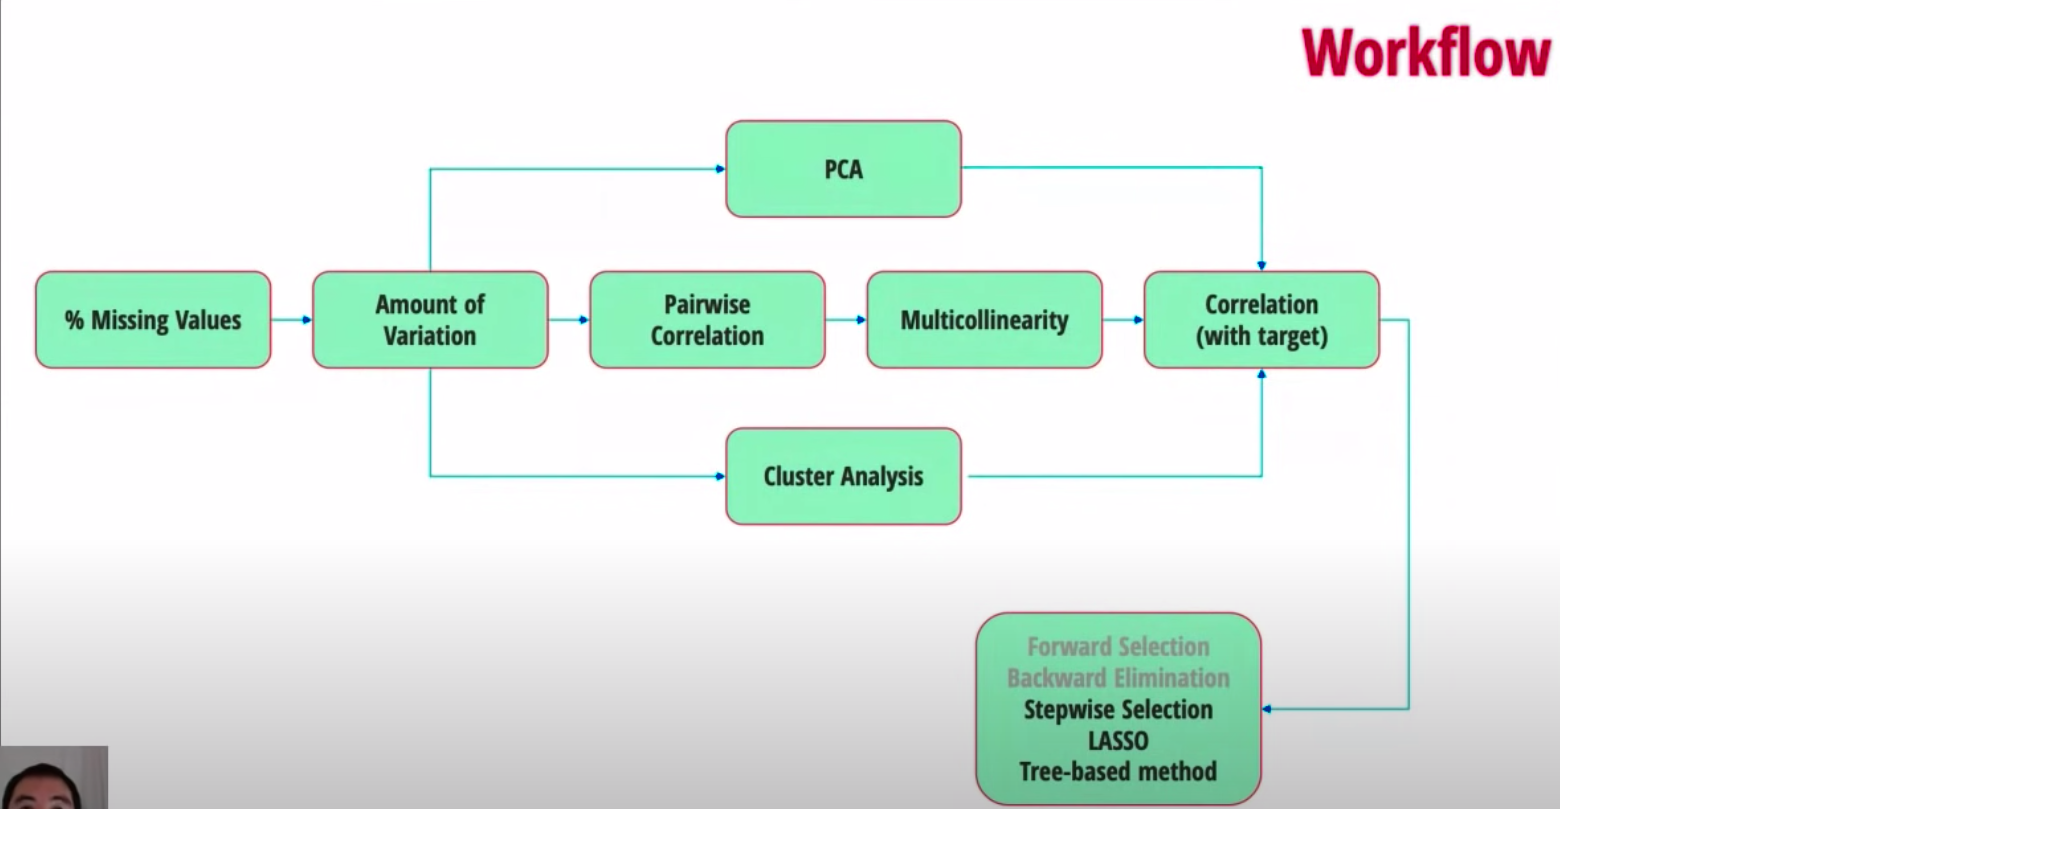

In [55]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

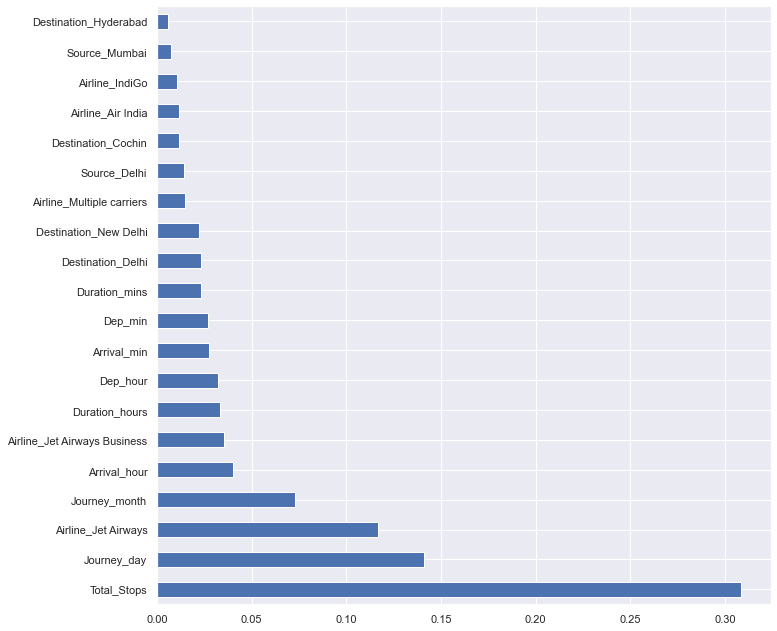

In [56]:
plt.figure(figsize=(11,11))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh');

### Fitting Model using Random Forest

Note that for Random Forest, we do not scale the data.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [59]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred = reg_rf.predict(X_test)

In [61]:
reg_rf.score(X_train, y_train) # return R^2 score

0.9502640896561524

In [62]:
reg_rf.score(X_test, y_test)

0.7308488376007829

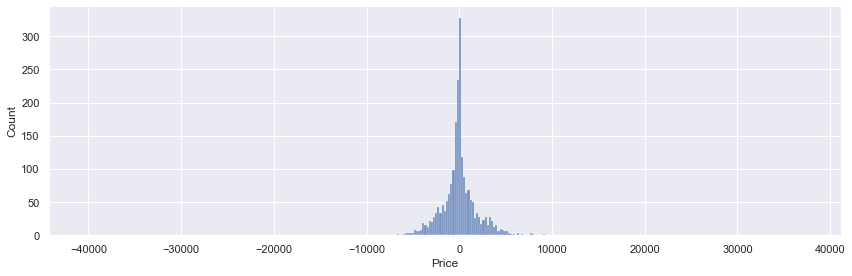

In [63]:
sns.displot(y_test - y_pred, height=4, aspect=3) # plotting the distribution of errors

The distribution of errors is Gaussian, which is good.

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 1360.0719152489742
MSE: 5739021.94543875
RMSE: 36.87915285427492


In [66]:
metrics.r2_score(y_test, y_pred) # similar to reg_rf.score(X_test, y_test)

0.7308488376007829

### Hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [68]:
# Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
bootstrap = [True, False]

In [69]:
rd_param_grid = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'bootstrap': bootstrap
                 }

rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=rd_param_grid, n_iter=11, cv=5, random_state=11, n_jobs=1, scoring='neg_mean_squared_error')

In [70]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=11, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=11, scoring='neg_mean_squared_error')

In [71]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

In [72]:
best_rf = rf_random.best_estimator_

In [73]:
prediction = best_rf.predict(X_test)

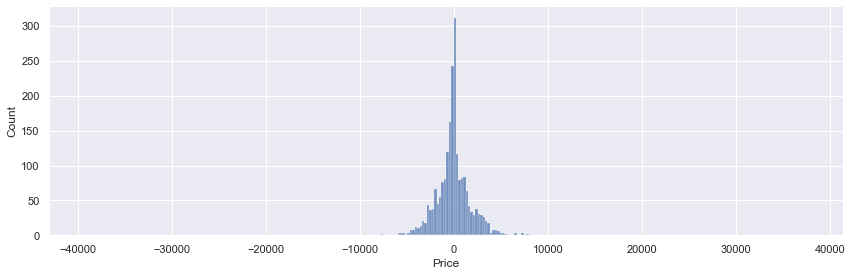

In [74]:
sns.displot(y_test - prediction, height=4, aspect=3)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

MAE: 1333.4819086139494
MSE: 5379934.486420476
RMSE: 36.5168715611558


In [76]:
metrics.r2_score(y_test, prediction)

0.7476894783783572

In [77]:
import pickle

In [78]:
pickle.dump(best_rf, open('flight_fare_random_forest.pkl', 'wb'))